# EPIC Institute of Technology
## Data Science Mid-term Exam

# Data

gender.csv

### Objective features:

Age
Height
Weight
Sex (gender)
Measurement results:

Upper and lower blood pressure (ap_hi, ap_lo)
Cholesterol (cholesterol)
Glucose (glucose)

### Subjective features (according to patients):

Smoking (smoke)
Drinking alcohol (alco)
Physical activity (active)
Target sign (which will be interesting to predict):
The presence of cardiovascular diseases according to the results of a classic medical examination (cardio)

Age is given in days.
The values of cholesterol and glucose are represented by one of three classes: normal, above normal, significantly above normal.
The values of subjective features are binary.

All figures are given at the time of inspection.

## Task 0
### Import necesssary libraries and read the data. Note that data is separated with semicolon ';'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gender.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Task 1 (2 points) 
### Exploratory Data Analysis (EDA): Create Descriptive Graphs for Initial Data Exploration. 
- Histograms for Age, Height, Weight, ap_hi, and ap_lo to visualize the distribution.
- Bar charts for gender, smoke, alco, and active to show the count of each category.
- Any other graphs that you find useful

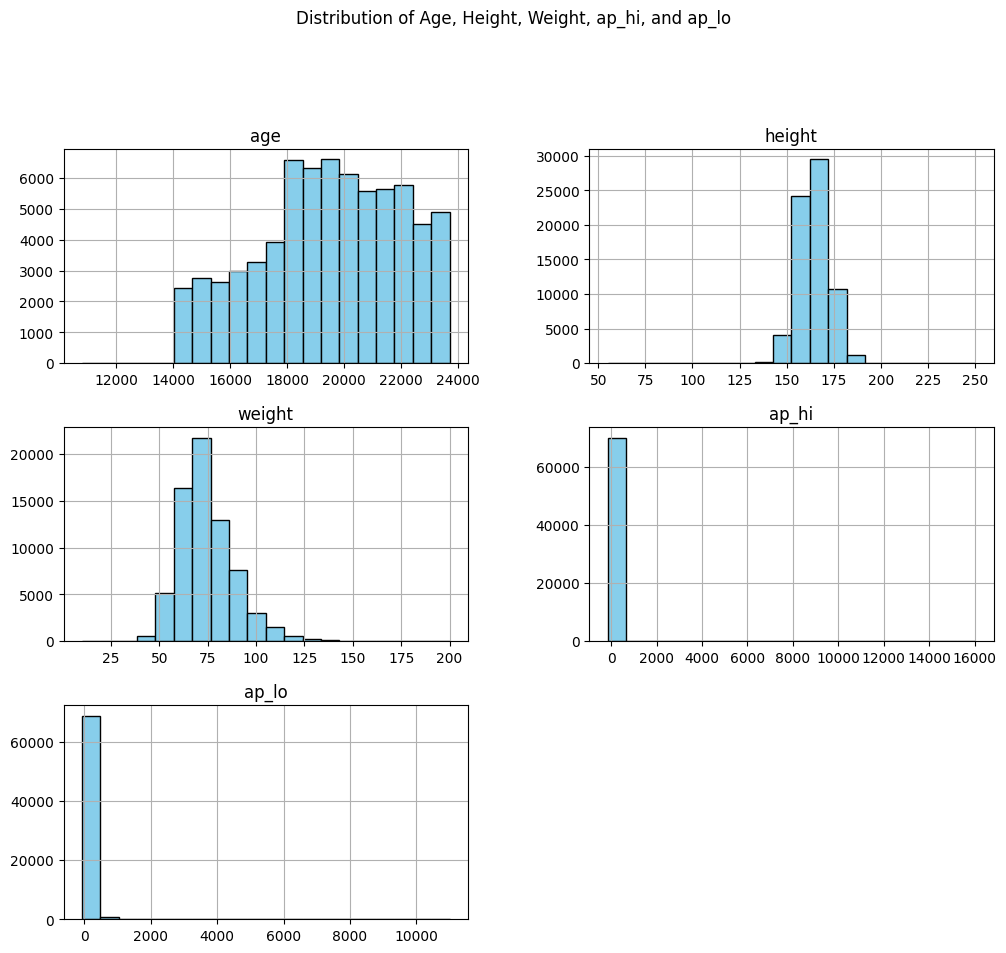

In [3]:
df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Age, Height, Weight, ap_hi, and ap_lo', y=1.02)
plt.show()

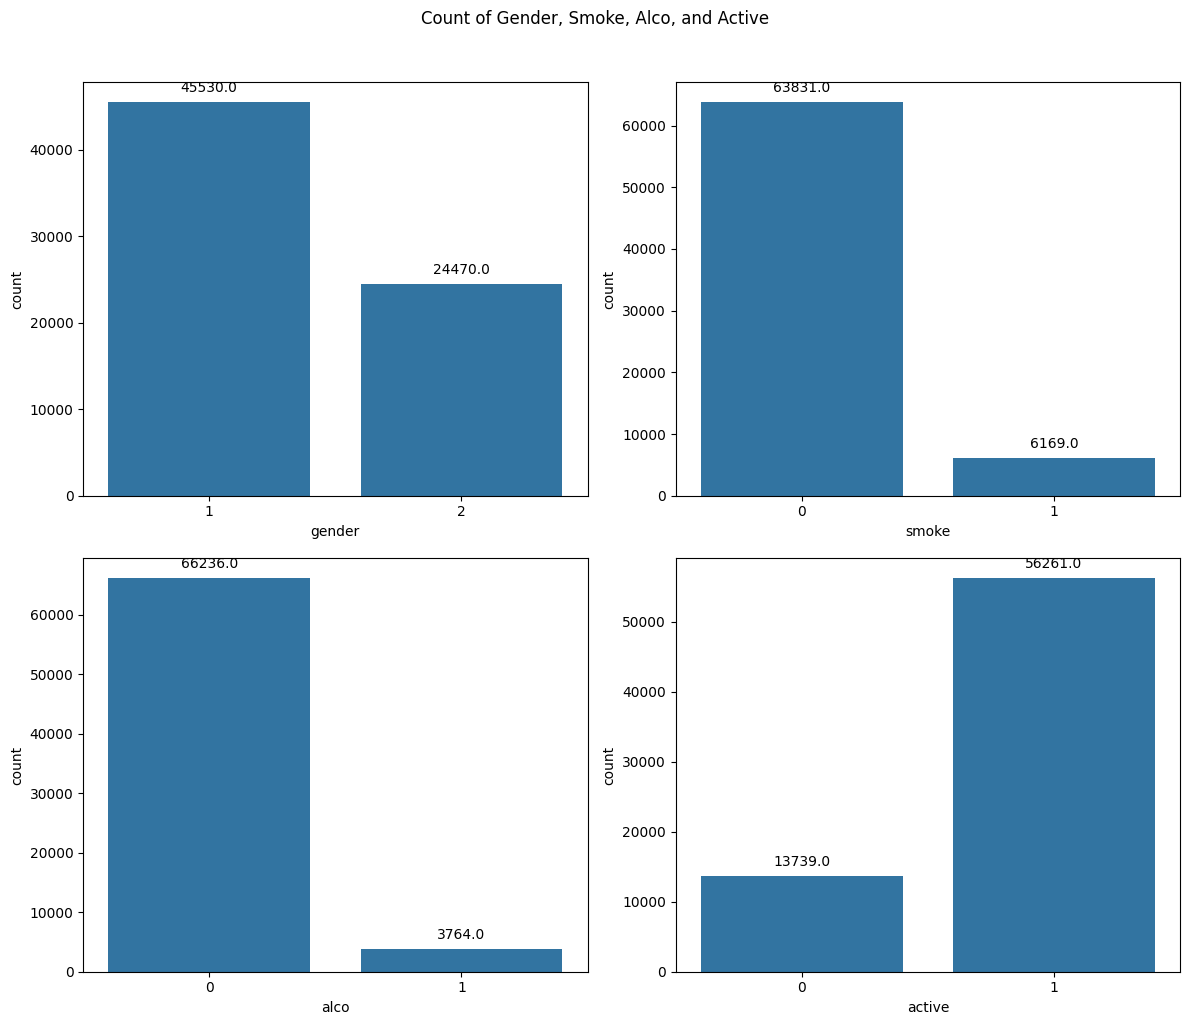

In [4]:
def plot_countplot_with_values(x, data, ax):
    sns.countplot(x=x, data=data, ax=ax)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
plot_countplot_with_values('gender', df, axes[0, 0])
plot_countplot_with_values('smoke', df, axes[0, 1])
plot_countplot_with_values('alco', df, axes[1, 0])
plot_countplot_with_values('active', df, axes[1, 1])

plt.suptitle('Count of Gender, Smoke, Alco, and Active', y=1.02)
plt.tight_layout()
plt.show()

### From this barchart we can see that respondents are mostly active and don't smoke or drink

## Task 2 (1 point) 
### Data Cleaning: Identify and Remove Outliers in Non-Binary Features
- Identify and remove 5% (both bottom and top) of outliers for non-binary features.
- Identify and remove other inappropriate data (such as negative values)

### Based on this graphs from the previous we can aknowledge that some of the data in a dataset is irrelevant. Let's check

In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Indeed we can see that some of the values in our dataset are totally irrelevant: e.g. negative values for ap_hi and ap_low. I'm not a healthcare expert so let's just leave ap_lo values in range 50 - 130 and api_hi in range 70 - 210. Also let's drop all entries where age is <14000, height <140 and >210, weight<40

In [6]:
df = df[(df['ap_hi'] >= 70) & (df['ap_hi'] <= 210) & (df['ap_lo'] >= 50) & (df['ap_lo'] <= 130)]
df = df[(df['age'] >= 14000) & (df['height'] >= 140) & (df['height'] <= 210) & (df['weight'] >= 40)]

In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68474.000000,68474.000000,68474.000000,68474.000000,68474.000000,68474.000000,68474.000000,68474.000000,68474.000000,68474.000000,68474.000000,68474.000000,68474.000000
mean,49971.716213,19464.094211,1.348921,164.470514,74.134177,126.584850,81.328022,1.364635,1.225692,0.088077,0.053539,0.803371,0.494582
std,28851.320843,2466.960779,0.476632,7.797067,14.244379,16.575018,9.397044,0.678946,0.571628,0.283409,0.225106,0.397453,0.499974
min,0.000000,14275.000000,1.000000,140.000000,40.000000,70.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24997.250000,17657.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50011.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74876.750000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,207.000000,200.000000,210.000000,130.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Now the data looks much better and graphs can be more illustrative

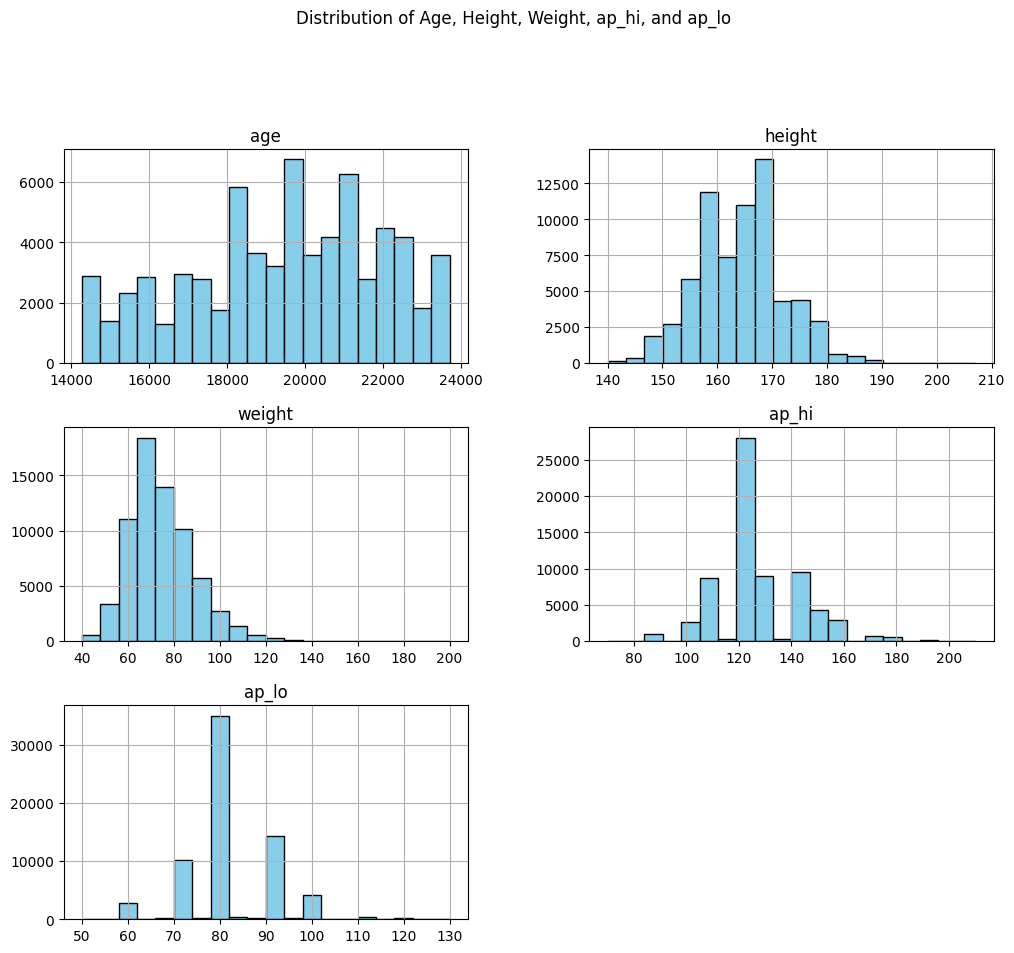

In [8]:
df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Age, Height, Weight, ap_hi, and ap_lo', y=1.02)
plt.show()

### As we dropped some data the valuecounts in bar chart should also decrease 

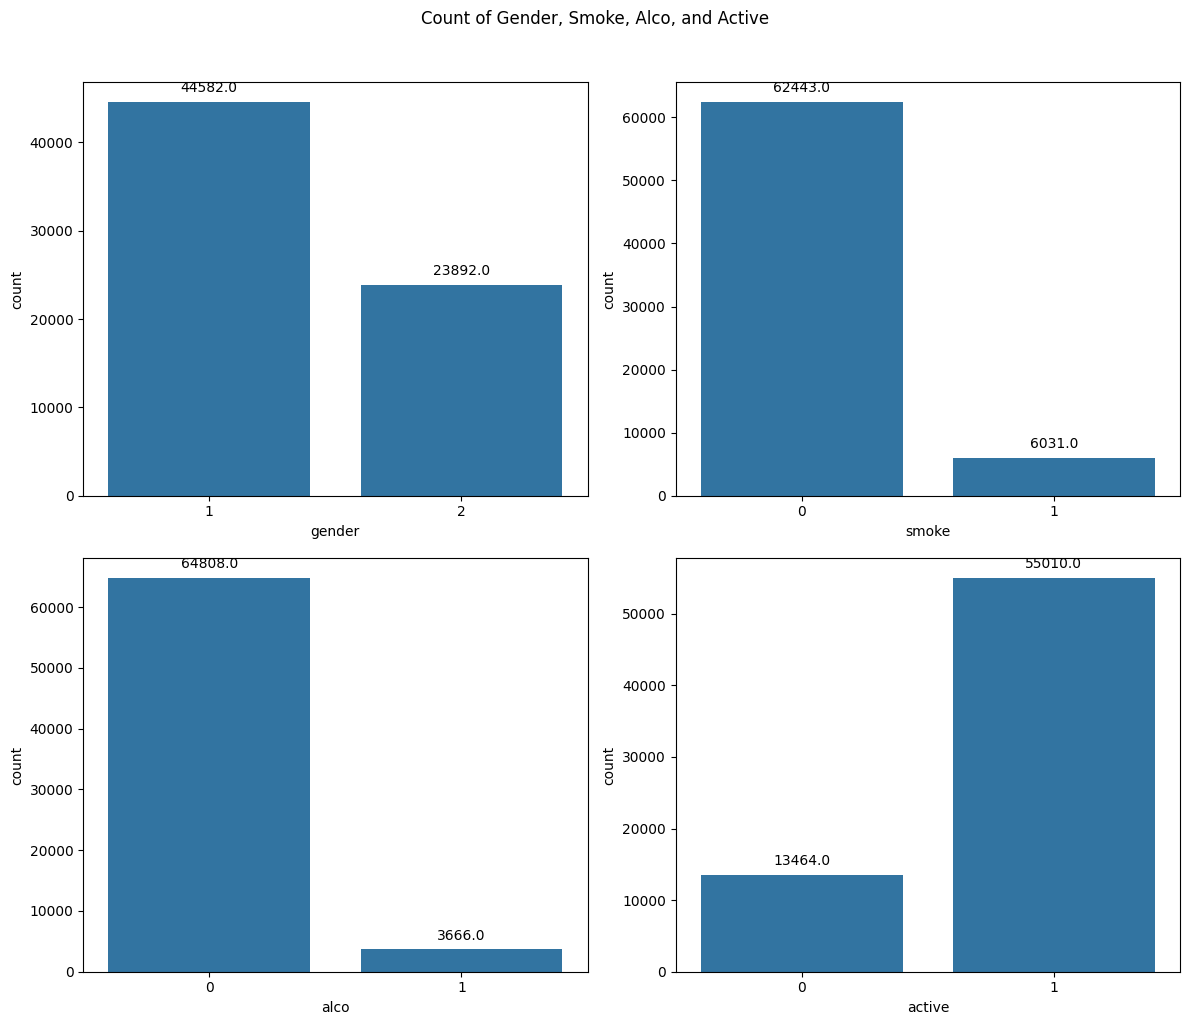

In [9]:
def plot_countplot_with_values(x, data, ax):
    sns.countplot(x=x, data=data, ax=ax)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
plot_countplot_with_values('gender', df, axes[0, 0])
plot_countplot_with_values('smoke', df, axes[0, 1])
plot_countplot_with_values('alco', df, axes[1, 0])
plot_countplot_with_values('active', df, axes[1, 1])

plt.suptitle('Count of Gender, Smoke, Alco, and Active', y=1.02)
plt.tight_layout()
plt.show()

### Let's stick to the task and also identify and remove 5% (both bottom and top) of outliers for non-binary features.

In [10]:
non_binary_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

df[non_binary_features].describe()

,age,height,weight,ap_hi,ap_lo
count,68474.000000,68474.000000,68474.000000,68474.000000,68474.000000
mean,19464.094211,164.470514,74.134177,126.584850,81.328022
std,2466.960779,7.797067,14.244379,16.575018,9.397044
min,14275.000000,140.000000,40.000000,70.000000,50.000000
25%,17657.000000,159.000000,65.000000,120.000000,80.000000
50%,19700.000000,165.000000,72.000000,120.000000,80.000000
75%,21323.000000,170.000000,82.000000,140.000000,90.000000
max,23713.000000,207.000000,200.000000,210.000000,130.000000


In [11]:
# Function to remove outliers
def remove_outliers(data, column):
    q_low = data[column].quantile(0.05)
    q_high = data[column].quantile(0.95)
    data = data[(data[column] >= q_low) & (data[column] <= q_high)]
    return data

# Remove outliers for each non-binary feature
for feature in non_binary_features:
    df = remove_outliers(df, feature)

# Verify the changes
df[non_binary_features].describe()

,age,height,weight,ap_hi,ap_lo
count,46740.000000,46740.000000,46740.000000,46740.000000,46740.000000
mean,19555.696513,164.760377,73.685581,126.964934,81.970175
std,2118.822343,6.230587,10.498880,12.910599,7.359485
min,15063.000000,152.000000,56.000000,110.000000,70.000000
25%,18151.000000,160.000000,65.000000,120.000000,80.000000
50%,19724.000000,165.000000,72.000000,120.000000,80.000000
75%,21220.000000,169.000000,80.000000,140.000000,90.000000
max,23257.000000,178.000000,100.000000,160.000000,100.000000


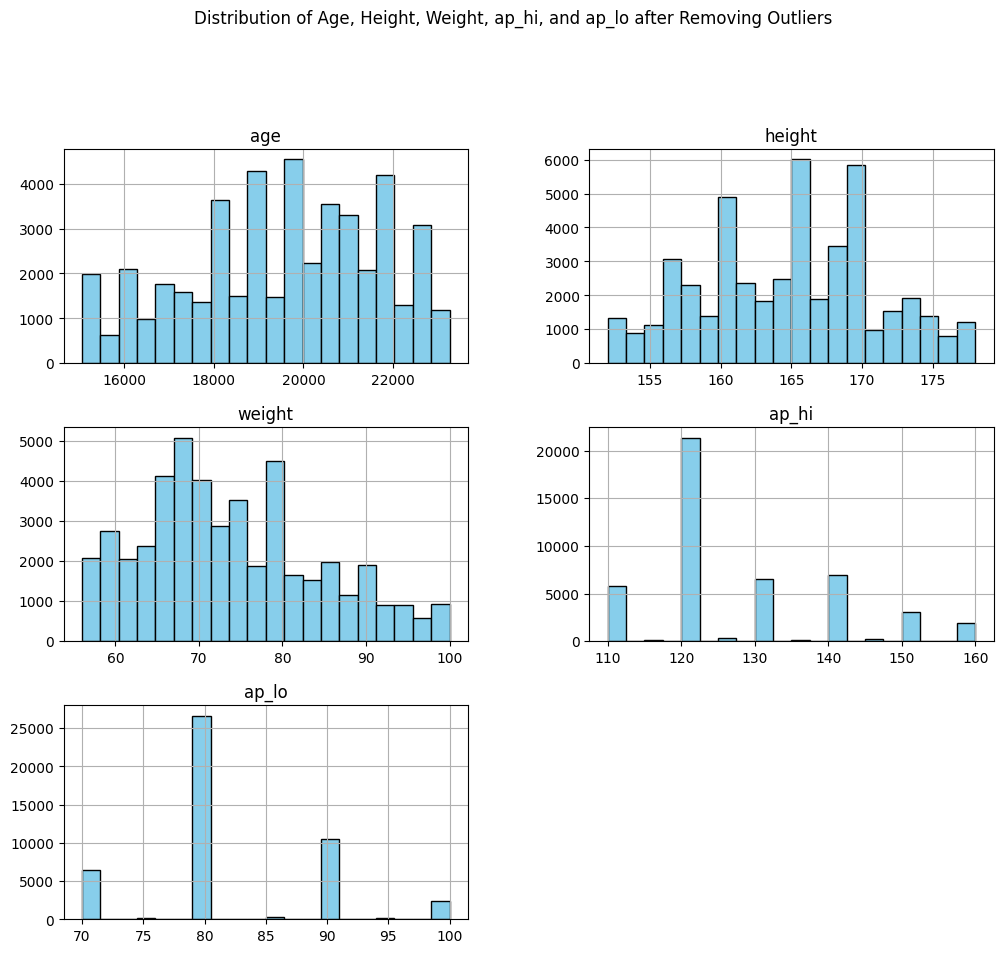

In [12]:
# Histograms for non-binary features after removing outliers
df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Age, Height, Weight, ap_hi, and ap_lo after Removing Outliers', y=1.02)
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46740 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           46740 non-null  int64  
 1   age          46740 non-null  int64  
 2   gender       46740 non-null  int64  
 3   height       46740 non-null  int64  
 4   weight       46740 non-null  float64
 5   ap_hi        46740 non-null  int64  
 6   ap_lo        46740 non-null  int64  
 7   cholesterol  46740 non-null  int64  
 8   gluc         46740 non-null  int64  
 9   smoke        46740 non-null  int64  
 10  alco         46740 non-null  int64  
 11  active       46740 non-null  int64  
 12  cardio       46740 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 5.0 MB


## Task 3 (1 point)
### Confidence Intervals: Calculate Confidence Intervals for Height and Weight
- After cleaning, calculate the 95% confidence interval for height and 99.7% for weight.

### This task was little bit ambiguous. So it was not taken into account in the final score. Below you can see some possible soultions. Try to interpreatate results by yourself. 

### 1. Using 68–95–99.7 rule or z-score.

In [14]:
def confidence_interval(data, n):
    mean = data.mean()
    std = data.std()
    return (mean - n * std, mean + n * std)

l1, r1 = confidence_interval(df['height'], 2) # 1.96 using z-score
print('Confidence interval for height: ', l1, r1) 

l2, r2 = confidence_interval(df['weight'], 3.00) # 2.81 using z-score
print('Confidence interval for weight: ', l2, r2)

Confidence interval for height:  152.29920180189438 177.22155130037348
Confidence interval for weight:  42.18894213483598 105.18222003889103


### This calculations show us that 95% of heights / 99.7% of weights will be present in a given range

### 2. Confidence interval for a sample mean

In [15]:
# Sample data for height and weight
data_height = df['height'].values
data_weight = df['weight'].values

# Sample sizes
n_height = len(data_height)
n_weight = len(data_weight)

# Calculate sample mean
mean_height = np.mean(data_height)
mean_weight = np.mean(data_weight)

# Calculate standard error of the mean
se_height = np.std(data_height, ddof=1) / np.sqrt(n_height)
se_weight = np.std(data_weight, ddof=1) / np.sqrt(n_weight)

# Z-scores for 95% and 99.7% confidence intervals
Z_95 = 1.96  # for 95%
Z_997 = 2.81  # for 99.7%

# Calculate confidence intervals using p-hat
ci_height = (mean_height - Z_95 * se_height, mean_height + Z_95 * se_height)
ci_weight = (mean_weight - Z_997 * se_weight, mean_weight + Z_997 * se_weight)

print("Confidence Intervals:")
print(f"95% Confidence Interval for Height: {ci_height}")
print(f"99.7% Confidence Interval for Weight: {ci_weight}")

Confidence Intervals:
95% Confidence Interval for Height: (164.70389056591426, 164.8168625363536)
99.7% Confidence Interval for Weight: (73.549121226267, 73.82204094746001)


### As we have a huge sample - it's mean lies within a narrow range

### The one more tricky part about this task is that the distribution is not normal. It is worth recalling a lesson emphasizing that "In case of multi-modal distributions, reporting the mean, median, or mode can be uninformative at all, as none of them describes the central location of populations. While it is possible to compute the confidence interval of statistics using non-parameteric methods like bootstrap, it is useless". Therefore, to provide a more accurate representation, we have opted to calculate confidence intervals separately for each gender.

## Task 4 (1 point)
### Data Transformation - One-Hot Encoding:
- Apply one-hot encoding for cholesterol and glucose.

In [16]:
df_onehot = pd.get_dummies(df, columns=['cholesterol', 'gluc'], prefix=['cholesterol', 'gluc'])

df_onehot.head()

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,0,18393,2,168,62.0,110,80,0,0,1,0,True,False,False,True,False,False
1,1,20228,1,156,85.0,140,90,0,0,1,1,False,False,True,True,False,False
2,2,18857,1,165,64.0,130,70,0,0,0,1,False,False,True,True,False,False
3,3,17623,2,169,82.0,150,100,0,0,1,1,True,False,False,True,False,False
6,9,22113,1,157,93.0,130,80,0,0,1,0,False,False,True,True,False,False


### While we performed one-hot encoding for 'cholesterol' and 'gluc' in this example, it's essential to understand that the choice between one-hot encoding and ordinal encoding depends on the nature of the categorical variables. In our case, the values 'normal', 'above normal', and 'significantly above normal' could be effectively encoded as 1, 2, and 3, respectively. This preserves the ordinal relationship between the categories, where a higher value implies a higher level. On the other hand, one-hot encoding is particularly useful when dealing with non-ordinal categorical variables, such as colors like 'yellow', 'red', and 'blue', where there's no inherent order or numerical relationship between the categories.

## Task 5 (2 points)
### Hypothesis Testing - T-Test: Investigate Gender Differences in Average Height
- Before conducting the two-tailed t-test to compare the average height between men and women, check for significant differences in variance between the two groups
- If the variance differs significantly, use Welch's t-test

In [17]:
import scipy.stats as stats

# Separate data for men and women
data_men_height = df[df['gender'] == 2]['weight'].values
data_women_height = df[df['gender'] == 1]['weight'].values

# Check for significant differences in variance
_, p_value_var = stats.levene(data_men_height, data_women_height)

# Display the p-value for variance test
print("Levene's Test p-value for Height Variance: {:.4f}".format(p_value_var))

# Choose t-test based on the variance test result
if p_value_var < 0.05:
    # Variance differs significantly, use Welch's t-test
    t_stat, p_value_t = stats.ttest_ind(data_men_height, data_women_height, equal_var=False)
    test_used = "Welch's T-Test"
else:
    # No significant difference in variance, use regular t-test
    t_stat, p_value_t = stats.ttest_ind(data_men_height, data_women_height, equal_var=True)
    test_used = "T-Test"

# Display the results
print("{} Results:".format(test_used))
print("T-Statistic: {:.4f}".format(t_stat))
print("P-Value: {:.4f}".format(p_value_t))

Levene's Test p-value for Height Variance: 0.0188
Welch's T-Test Results:
T-Statistic: 23.7930
P-Value: 0.0000


### p-value of 0.0000 from Levene's test indicates a highly significant difference in variance between the heights of men and women. This is why we opted to use Welch's t-test, which is robust to unequal variances when comparing the average height between men and women. <br>The extremely small p-value (0.0000) provides strong evidence against the null hypothesis. Therefore, we reject the null hypothesis and conclude that there is a significant difference in average height between men and women. The large T-Statistic further supports the notion that the observed difference is not likely due to random chance.<br>In practical terms, it suggests that there is a meaningful and statistically significant difference in the average height between the two gender groups.

## Task 6 (3 points)
### Model building: Build and Optimize Model for Cardiovascular Disease Prediction
- Select a model of your choice and predict Cardiovascular Disease
- Try different hyperparameters to optimize the model
- Calculate model accuracy

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.drop('cardio', axis=1)
y = df['cardio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)
lr_preds = lr_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

# Evaluate performance
rf_metrics = [accuracy_score(y_test, rf_preds),
              precision_score(y_test, rf_preds),
              recall_score(y_test, rf_preds),
              f1_score(y_test, rf_preds)]

lr_metrics = [accuracy_score(y_test, lr_preds),
              precision_score(y_test, lr_preds),
              recall_score(y_test, lr_preds),
              f1_score(y_test, lr_preds)]

gb_metrics = [accuracy_score(y_test, gb_preds),
              precision_score(y_test, gb_preds),
              recall_score(y_test, gb_preds),
              f1_score(y_test, gb_preds)]

# Create a table with performance results
results = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
results['Random Forest'] = rf_metrics
results['Logistic Regression'] = lr_metrics
results['Gradient Boosting'] = gb_metrics

print(results)

           Random Forest  Logistic Regression  Gradient Boosting
Accuracy        0.710847             0.694801           0.726466
Precision       0.732001             0.723600           0.756383
Recall          0.679098             0.645386           0.680362
F1 Score        0.704558             0.682259           0.716362
